# Performing Sentiment Analysis on Twitter data

In [4]:
#importing basic requried library 

import pandas as pd
import numpy as np
import argparse
import tweepy

In [5]:
#importing library related to NLP

import nltk
import glob
import os
import numpy as np
import string
import pickle
from textblob import TextBlob

In [7]:
# Importing Library related to preprocessing of text

from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
from tqdm import tqdm
from sklearn import utils
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from collections import defaultdict

In [8]:
#importing library for model fitting

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# reading data from file

In [9]:
df = pd.read_csv('final_data.csv')

In [10]:
df.shape

(3881, 22)

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(3776, 22)

In [78]:
df.columns

Index(['Sno.', 'Unnamed: 0', 'created', 'favoriteCount', 'favorited', 'id',
       'isRetweet', 'latitude', 'longitude', 'replyToSID', 'replyToSN',
       'replyToUID', 'retweetCount', 'retweeted', 'sbi', 'sbo', 'screenName',
       'sni', 'sno', 'statusSource', 'text', 'truncated'],
      dtype='object')

In [79]:
df = df['text']
len(df)

3776

In [80]:
df = pd.DataFrame(df)

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
len(df)

2101

In [86]:
df2 = data.append(df,ignore_index=True)

/home/curaj/.local/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [87]:
df2

,polarity,text
0,1.0,RT @BigBoxout: BRO on god if this shit get lik...
1,1.0,BRO on god if this shit get like 50 likes ill ...
2,1.0,"if anybody was wondering what i got, it was a ..."
3,1.0,"RT @BonnieBlueTK: Not the best pic, but... bab..."
4,1.0,"Had 2 good ass beef sandwiches, almost saw a f..."
5,1.0,@trakk00 When I brought my first planner here ...
6,1.0,@Beef_Ledbetter You Canadian? I think we may h...
7,1.0,Its time for a very special #AMA with the Meda...
8,1.0,Mmm...beef and bean chimichangas with ketchup ...
9,1.0,"There's also a Hawaiian form of Martial Arts, ..."


In [88]:
import re
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [89]:
for i in range(len(df2)):
    df2.iloc[i][1] = clean_tweet(df2.iloc[i][1])
df2

/home/curaj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,polarity,text
0,1.0,RT @BigBoxout: BRO on god if this shit get lik...
1,1.0,BRO on god if this shit get like 50 likes ill ...
2,1.0,"if anybody was wondering what i got, it was a ..."
3,1.0,"RT @BonnieBlueTK: Not the best pic, but... bab..."
4,1.0,"Had 2 good ass beef sandwiches, almost saw a f..."
5,1.0,@trakk00 When I brought my first planner here ...
6,1.0,@Beef_Ledbetter You Canadian? I think we may h...
7,1.0,Its time for a very special #AMA with the Meda...
8,1.0,Mmm...beef and bean chimichangas with ketchup ...
9,1.0,"There's also a Hawaiian form of Martial Arts, ..."


In [97]:
def get_polarity_subjectivity(data,target):
    n = len(data)
    polarity =[]
    subjectivity =[]
    for i in range(n):
        st = str(data.iloc[i][target])
        analysis = TextBlob(st)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    return polarity,subjectivity

In [98]:
polarity,subjectivity = get_polarity_subjectivity(df2,target='text')

In [99]:
df2['polarity2'] = polarity
df2['subjectivity'] = subjectivity

In [120]:
df2.at[5,'polarity2']=0.25

In [121]:
for i in range(len(df2)):
    if math.isnan(df2.iloc[i]['polarity']):
        df2.at[i,'polarity']=df2.at[i,'polarity2']

In [126]:
df2['polarity1'] = [1 if x > 0 else -1 for x in df2['polarity']] 

In [128]:
df2['subjectivity2'] = df2['polarity1']*df2['subjectivity']

In [130]:
df2['sentimnt1'] = df2['polarity1']*df2['subjectivity']
df2['sentimnt2'] = df2['polarity2']*df2['subjectivity']

In [132]:
df2.drop(['polarity','subjectivity'],axis=1,inplace=True)
df2

,text,polarity2,polarity1,subjectivity2,sentimnt1,sentimnt2
0,RT @BigBoxout: BRO on god if this shit get lik...,-0.300000,1,0.700000,0.700000,-0.210000
1,BRO on god if this shit get like 50 likes ill ...,-0.300000,1,0.700000,0.700000,-0.210000
2,"if anybody was wondering what i got, it was a ...",0.500000,1,1.000000,1.000000,0.500000
3,"RT @BonnieBlueTK: Not the best pic, but... bab...",0.500000,1,0.150000,0.150000,0.075000
4,"Had 2 good ass beef sandwiches, almost saw a f...",0.650000,1,0.700000,0.700000,0.455000
5,@trakk00 When I brought my first planner here ...,0.250000,1,0.333333,0.333333,0.083333
6,@Beef_Ledbetter You Canadian? I think we may h...,0.350000,1,0.500000,0.500000,0.175000
7,Its time for a very special #AMA with the Meda...,0.300325,1,0.621429,0.621429,0.186630
8,Mmm...beef and bean chimichangas with ketchup ...,0.175000,1,0.550000,0.550000,0.096250
9,"There's also a Hawaiian form of Martial Arts, ...",0.050000,1,0.600000,0.600000,0.030000


In [133]:
df2.to_csv('cleaned_data.csv',index=False)

In [5]:
data = pd.read_csv('cleaned_data.csv')
print(data.shape)
data.head()

(3032, 6)


,text,polarity2,polarity1,subjectivity2,sentimnt1,sentimnt2
0,RT @BigBoxout: BRO on god if this shit get lik...,-0.30,1.0,0.70,0.70,-0.210
1,BRO on god if this shit get like 50 likes ill ...,-0.30,1.0,0.70,0.70,-0.210
2,"if anybody was wondering what i got, it was a ...",0.50,1.0,1.00,1.00,0.500
3,"RT @BonnieBlueTK: Not the best pic, but... bab...",0.50,1.0,0.15,0.15,0.075
4,"Had 2 good ass beef sandwiches, almost saw a f...",0.65,1.0,0.70,0.70,0.455


# divide data into train and test set

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data)
print(len(train))
print(len(test))

2274
758


# Clean Tweet and get a corpus list

In [7]:
def clean_review(text):
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

In [8]:
def get_corpus(data):
    lst =[]
    for i in range(len(data)):
        st = str(data.iloc[i]['text'])
        st = clean_review(st) 
        st = ' '.join(st)
        lst.append(st)
    print(len(lst))
    data['keyword'] = lst
    return lst

In [9]:
total_corpus = get_corpus(data)

3032


In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(total_corpus)
vocab =vectorizer.vocabulary_
vocab

{'rt': 6420,
 'bigboxout': 789,
 'bro': 1022,
 'god': 3064,
 'shit': 6778,
 'get': 2995,
 'like': 4322,
 'likes': 4326,
 'ill': 3572,
 'meet': 4714,
 'wit': 8647,
 'kevinmh': 4040,
 'xman': 8720,
 'vacation': 8357,
 'next': 5111,
 'summer': 7285,
 'mma': 4874,
 'fight': 2679,
 'https': 3489,
 'anybody': 344,
 'wondering': 8664,
 'got': 3100,
 'quesarito': 6010,
 'beef': 682,
 'bonniebluetk': 930,
 'best': 764,
 'pic': 5625,
 'baby': 548,
 'back': 551,
 'ribs': 6314,
 'cheesey': 1370,
 'garlic': 2951,
 'bread': 983,
 'dinner': 2106,
 'nt': 5213,
 'pork': 5769,
 'good': 3078,
 'ass': 450,
 'sandwiches': 6518,
 'almost': 222,
 'saw': 6558,
 'hit': 3406,
 'pole': 5735,
 'parking': 5479,
 'lot': 4424,
 'fireworks': 2720,
 'night': 5137,
 'brought': 1037,
 'first': 2721,
 'planner': 5683,
 'canada': 1179,
 'bugged': 1072,
 'weeks': 8548,
 'listed': 4359,
 'number': 5218,
 'beefledbetter': 700,
 'canadian': 1180,
 'think': 7948,
 'may': 4653,
 'similar': 6834,
 'beliefs': 729,
 'guys': 3212,


In [14]:
import nltk
word_data = "The best performance can bring in sky high success."
nltk_tokens = nltk.word_tokenize(word_data)  	
l = list(nltk.bigrams(nltk_tokens))
list(l[1])
' '.join(l[1])

'best performance'

In [19]:
def get_corpus_bigram(data):
    lst =[]
    vocab ={}
    for i in range(len(data)):
        st = str(data.iloc[i]['text'])
        st = clean_review(st) 
        st = str(' '.join(st))
        nltk_tokens = nltk.word_tokenize(word_data)
        l = list(nltk.bigrams(nltk_tokens))
        for j in l:
            print(j)
            bi = list(j)
            word = ' '.join(bi)
            vocab[word] = 1
    return vocab

In [20]:
get_corpus_bigram(data)

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in',

('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best', 'performance')
('performance', 'can')
('can', 'bring')
('bring', 'in')
('in', 'sky')
('sky', 'high')
('high', 'success')
('success', '.')
('The', 'best')
('best

{'The best': 1,
 'best performance': 1,
 'performance can': 1,
 'can bring': 1,
 'bring in': 1,
 'in sky': 1,
 'sky high': 1,
 'high success': 1,
 'success .': 1}

In [18]:
data

,text,polarity2,polarity1,subjectivity2,sentimnt1,sentimnt2,keyword
0,RT @BigBoxout: BRO on god if this shit get lik...,-0.300000,1.0,0.700000,0.700000,-0.210000,rt bigboxout bro god shit get like likes ill m...
1,BRO on god if this shit get like 50 likes ill ...,-0.300000,1.0,0.700000,0.700000,-0.210000,bro god shit get like likes ill meet wit kevin...
2,"if anybody was wondering what i got, it was a ...",0.500000,1.0,1.000000,1.000000,0.500000,anybody wondering got quesarito beef https
3,"RT @BonnieBlueTK: Not the best pic, but... bab...",0.500000,1.0,0.150000,0.150000,0.075000,rt bonniebluetk best pic baby back ribs cheese...
4,"Had 2 good ass beef sandwiches, almost saw a f...",0.650000,1.0,0.700000,0.700000,0.455000,good ass beef sandwiches almost saw fight hit ...
5,@trakk00 When I brought my first planner here ...,0.250000,1.0,0.333333,0.333333,0.083333,brought first planner canada bugged weeks nt l...
6,@Beef_Ledbetter You Canadian? I think we may h...,0.350000,1.0,0.500000,0.500000,0.175000,beefledbetter canadian think may similar belie...
7,Its time for a very special #AMA with the Meda...,0.300325,1.0,0.621429,0.621429,0.186630,time special ama medallion month yurisgaming h...
8,Mmm...beef and bean chimichangas with ketchup ...,0.175000,1.0,0.550000,0.550000,0.096250,mmm beef bean chimichangas ketchup sour cream ...
9,"There's also a Hawaiian form of Martial Arts, ...",0.050000,1.0,0.600000,0.600000,0.030000,also hawaiian form martial arts dangerous thin...


# Get train and test corpus

In [12]:
train_corpus = get_corpus(train)
test_corpus = get_corpus(test)

2274


/home/curaj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


758


# generating word matrix

In [13]:
def BoWMatrix(docs):
    vectorizer = CountVectorizer(binary=True,vocabulary = vocab)
    Doc_Term_matrix = vectorizer.fit_transform(docs)
    return Doc_Term_matrix

def TfidfMatrix(docs):
    vectorizer = TfidfVectorizer(vocabulary = vocab,norm = 'l1')
    Doc_Term_matrix = vectorizer.fit_transform(docs)
    return Doc_Term_matrix

In [14]:
vectorizer = CountVectorizer(binary=True,vocabulary = vocab)
train_Doc_Term_matrix = vectorizer.fit_transform(train_corpus)
test_Doc_Term_matrix = vectorizer.fit_transform(test_corpus)
print(train_Doc_Term_matrix.shape)
print(test_Doc_Term_matrix.shape)


vectorizer = TfidfVectorizer(vocabulary = vocab,norm = 'l1')
train_tfidf_matrix = vectorizer.fit_transform(train_corpus)
test_tfidf_matrix = vectorizer.fit_transform(test_corpus)
print(train_tfidf_matrix.shape)
print(test_tfidf_matrix.shape)

(2274, 8829)
(758, 8829)
(2274, 8829)
(758, 8829)


In [15]:
y_train = train['polarity1'].values
y_test = test['polarity1'].values
print(len(y_train))
print(len(y_test))

2274
758


# ROC curve function

In [16]:
def ROC(Y_train, pred1, Y_test, pred2):
    fpr1, tpr1, thresholds1 = roc_curve(Y_train, pred1)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr1, tpr1, marker='.', color='blue', label="Train", linewidth=1.0)
    fpr2, tpr2, thresholds2 = roc_curve(Y_test, pred2)
    pyplot.plot(fpr2, tpr2, marker='.', color='red', label="Test", linewidth=1.0)
    pyplot.legend()
    pyplot.show()

In [17]:
def ROC2(X, pred, pred1, pred2):
    fpr, tpr, thresholds = roc_curve(X, pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    fpr1, tpr1, thresholds1 = roc_curve(X, pred1)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr1, tpr1, marker='.')
    fpr2, tpr2, thresholds2 = roc_curve(X, pred2)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr2, tpr2, marker='.')
    pyplot.show()

# model for training

In [64]:
X_train = train_Doc_Term_matrix.todense()
X_test =test_Doc_Term_matrix.todense()
y_train = train['polarity1']
y_test = test['polarity1']
y_train = y_train.fillna(1)
y_test = y_test.fillna(1)
type(y_train)

pandas.core.series.Series

In [62]:
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)
y_train =pd.core.series.Series(y_train)

In [65]:
y_train.unique()

array([-1.,  1.])

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000,tol=0.0000000000000001)
model.fit(X_train,y_train)
print(model.score(X_test,y_test),model.score(X_train,y_train))

/home/curaj/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7572559366754618 0.9898856640281443


In [29]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.03890874384322229

In [30]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.
/home/curaj/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/curaj/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/curaj/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/curaj/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [67]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_test,y_test),model.score(X_train,y_train))

0.6517150395778364 0.9832893579595426


In [87]:
def NN(X,Y_train,Xtest,Y_test,mtype):
    model = MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',max_iter=200)
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("FFN + " + mtype + " Train Accuracy: " + str(acc1*100) + "%")
    print("FFN + " + mtype + " Test Accuracy: " + str(acc2*100) + "%")
    prob1 = model.predict_proba(X)
    prob1 = prob1[:, 1]
    prob2 = model.predict_proba(Xtest)
    prob2 = prob2[:, 1]
    print('test auc score',roc_auc_score(y_test,prob2))
    print('train auc score',roc_auc_score(y_train,prob1))
    #ROC(Y_train, pred1, Y_test, pred2)
    ROC(Y_train, prob1, Y_test, prob2)

FFN + doc_term Train Accuracy: 99.86807387862797%
FFN + doc_term Test Accuracy: 72.29551451187335%
test auc score 0.8181286183041779
train auc score 0.9999953416438409


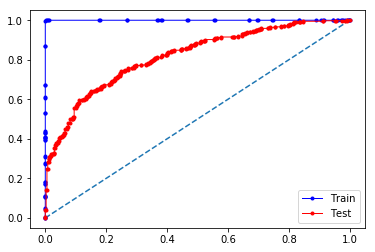

In [88]:
NN(X_train,y_train,X_test,y_test,'doc_term')

In [81]:
def SVM(X,Y_train,Xtest,Y_test,mtype):
    model = SVC(kernel='linear')
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("SVM + " + mtype + " Train Accuracy: " + str(acc1*100) + "%")
    print("SVM + " + mtype + " Test Accuracy: " + str(acc2*100) + "%")
    ROC(Y_train, pred1, Y_test, pred2)

SVM + doc_term Train Accuracy: 99.78012313104662%
SVM + doc_term Test Accuracy: 76.51715039577837%


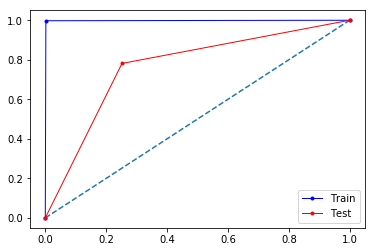

In [82]:
SVM(X_train,y_train,X_test,y_test,'doc_term')

In [96]:
def RF(X,Y_train,Xtest,Y_test,mtype):
    model = RandomForestClassifier(n_estimators=400, bootstrap=True, 
                                max_depth=100, max_features='auto', 
                                min_samples_leaf=4, min_samples_split=10) 
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("RandomForest + " + mtype + " Train Accuracy: " + str(acc1*100) + "%")
    print("RandomForest + " + mtype + " Test Accuracy: " + str(acc2*100) + "%")
    prob1 = model.predict_proba(X)
    prob1 = prob1[:, 1]
    prob2 = model.predict_proba(Xtest)
    prob2 = prob2[:, 1]
    print('test auc score',roc_auc_score(y_test,prob2))
    print('train auc score',roc_auc_score(y_train,prob1))
    #ROC(Y_train, pred1, Y_test, pred2)
    ROC(Y_train, prob1, Y_test, prob2)

RandomForest + docterm Train Accuracy: 80.16710642040458%
RandomForest + docterm Test Accuracy: 70.31662269129288%
test auc score 0.7956542033286657
train auc score 0.8955177297035423


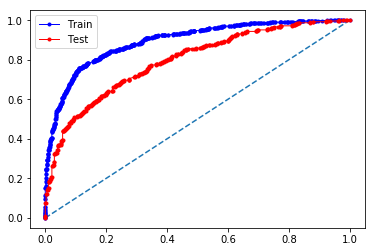

In [94]:
RF(X_train,y_train,X_test,y_test,'docterm')

In [108]:
from sklearn.ensemble import AdaBoostClassifier
def Adaboost(X,Y_train,Xtest,Y_test,mtype,est=100):
    model = AdaBoostClassifier(n_estimators=est, random_state=0,learning_rate=1.2)
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("RandomForest + " + mtype + " Train Accuracy: " + str(acc1*100) + "%")
    print("RandomForest + " + mtype + " Test Accuracy: " + str(acc2*100) + "%")
    prob1 = model.predict_proba(X)
    prob1 = prob1[:, 1]
    prob2 = model.predict_proba(Xtest)
    prob2 = prob2[:, 1]
    print('test auc score',roc_auc_score(y_test,prob2))
    print('train auc score',roc_auc_score(y_train,prob1))
    #ROC(Y_train, pred1, Y_test, pred2)
    ROC(Y_train, prob1, Y_test, prob2)

RandomForest + bag of word Train Accuracy: 76.73702726473175%
RandomForest + bag of word Test Accuracy: 71.2401055408971%
test auc score 0.7799722727304395
train auc score 0.8675885553505878


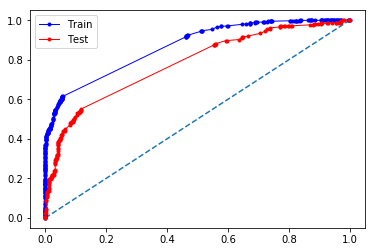

In [100]:
Adaboost(X_train,y_train,X_test,y_test,'bag of word',est=100)

RandomForest + bag of word Train Accuracy: 82.71767810026385%
RandomForest + bag of word Test Accuracy: 72.95514511873351%
test auc score 0.805926529702315
train auc score 0.9330031335209098


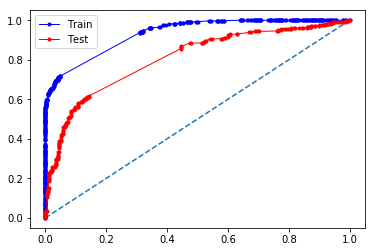

In [109]:
Adaboost(X_train,y_train,X_test,y_test,'bag of word',est=200)

RandomForest + bag of word Train Accuracy: 94.37115215479331%
RandomForest + bag of word Test Accuracy: 74.27440633245382%
test auc score 0.8014434900133063
train auc score 0.9934938292308743


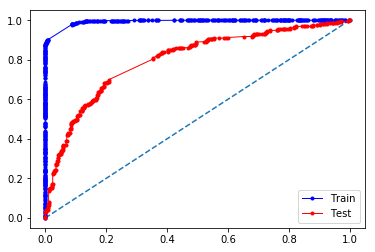

In [105]:
Adaboost(X_train,y_train,X_test,y_test,'bag of word',est=500)

In [116]:
from sklearn.ensemble import  GradientBoostingClassifier

def Xgboost(X,Y_train,Xtest,Y_test,mtype,est=100):
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=est)
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("RandomForest + " + mtype + " Train Accuracy: " + str(acc1*100) + "%")
    print("RandomForest + " + mtype + " Test Accuracy: " + str(acc2*100) + "%")
    prob1 = model.predict_proba(X)
    prob1 = prob1[:, 1]
    prob2 = model.predict_proba(Xtest)
    prob2 = prob2[:, 1]
    print('test auc score',roc_auc_score(y_test,prob2))
    print('train auc score',roc_auc_score(y_train,prob1))
    #ROC(Y_train, pred1, Y_test, pred2)
    ROC(Y_train, prob1, Y_test, prob2)

RandomForest + bag of word Train Accuracy: 84.82849604221636%
RandomForest + bag of word Test Accuracy: 72.16358839050132%
test auc score 0.8074452595425697
train auc score 0.9320792262159863


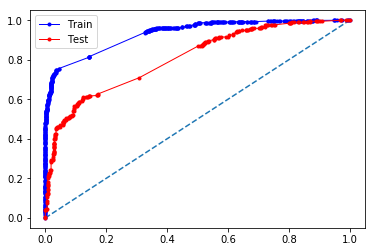

In [117]:
Xgboost(X_train,y_train,X_test,y_test,'bag of word',est=200)

RandomForest + bag of word Train Accuracy: 92.4802110817942%
RandomForest + bag of word Test Accuracy: 73.87862796833772%
test auc score 0.831434921033015
train auc score 0.9852885230526518


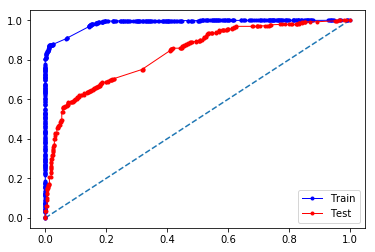

In [118]:
Xgboost(X_train,y_train,X_test,y_test,'bag of word',est=500)

RandomForest + bag of word Train Accuracy: 72.91116974494282%
RandomForest + bag of word Test Accuracy: 65.30343007915567%
test auc score 0.7761197149246557
train auc score 0.8628133520909806


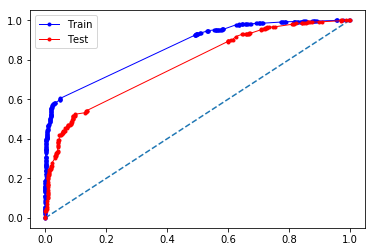

In [119]:
Xgboost(X_train,y_train,X_test,y_test,'bag of word',est=100)

In [120]:
X_train = train_tfidf_matrix.todense()
X_test =test_tfidf_matrix.todense()
y_train = train['polarity1']
y_test = test['polarity1']
y_train = y_train.fillna(-1)
y_test = y_test.fillna(-1)
type(y_train)

pandas.core.series.Series

FFN + tfidf Train Accuracy: 99.86807387862797%
FFN + tfidf Test Accuracy: 74.14248021108179%
test auc score 0.8134714123490849
train auc score 0.9999934020554537


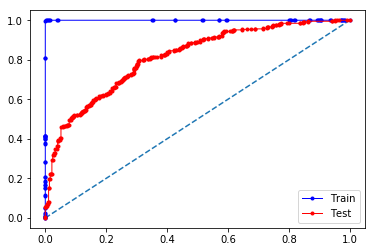

In [121]:
NN(X_train,y_train,X_test,y_test,'tfidf')

SVM + tfidf Train Accuracy: 59.49868073878628%
SVM + tfidf Test Accuracy: 57.38786279683378%


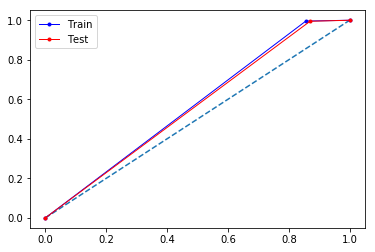

In [122]:
SVM(X_train,y_train,X_test,y_test,'tfidf')

RandomForest + tfidf Train Accuracy: 83.81706244503079%
RandomForest + tfidf Test Accuracy: 70.31662269129288%
test auc score 0.7969465170230108
train auc score 0.9260591641568603


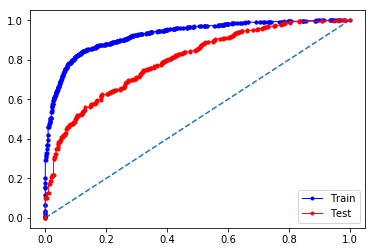

In [123]:
RF(X_train,y_train,X_test,y_test,'tfidf')

RandomForest + bag of word Train Accuracy: 77.61653474054529%
RandomForest + bag of word Test Accuracy: 69.12928759894459%
test auc score 0.7609080332448569
train auc score 0.870975253826808


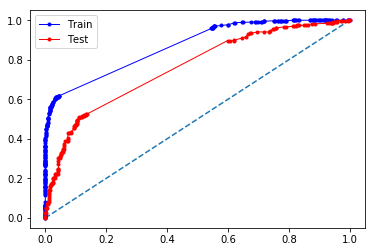

In [124]:
Adaboost(X_train,y_train,X_test,y_test,'bag of word',est=100)

RandomForest + bag of word Train Accuracy: 83.90501319261213%
RandomForest + bag of word Test Accuracy: 71.6358839050132%
test auc score 0.775374283305815
train auc score 0.9452149377464527


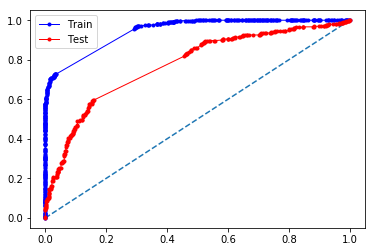

In [125]:
Adaboost(X_train,y_train,X_test,y_test,'bag of word',est=200)

RandomForest + bag of word Train Accuracy: 97.93315743183817%
RandomForest + bag of word Test Accuracy: 71.50395778364116%
test auc score 0.7733678879205245
train auc score 0.9990650324463627


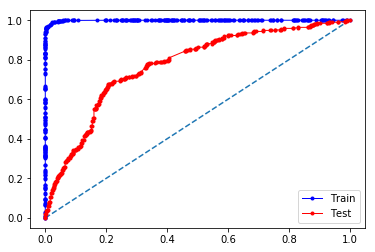

In [126]:
Adaboost(X_train,y_train,X_test,y_test,'bag of word',est=500)

RandomForest + bag of word Train Accuracy: 76.2532981530343%
RandomForest + bag of word Test Accuracy: 67.41424802110818%
test auc score 0.779289540967389
train auc score 0.8784258856770266


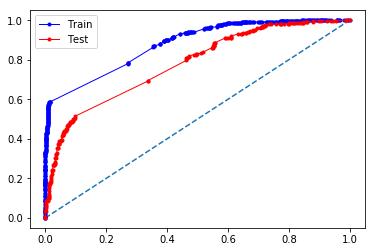

In [ ]:
Xgboost(X_train,y_train,X_test,y_test,'bag of word',est=100)

RandomForest + bag of word Train Accuracy: 84.30079155672823%
RandomForest + bag of word Test Accuracy: 72.29551451187335%
test auc score 0.8145373098975206
train auc score 0.943312789145217


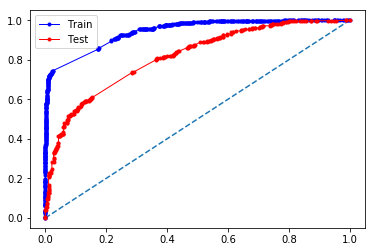

In [ ]:
Xgboost(X_train,y_train,X_test,y_test,'bag of word',est=200)

In [ ]:
Xgboost(X_train,y_train,X_test,y_test,'bag of word',est=500)